# Imports

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpmig
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd 
import random
from keras.preprocessing import image
%matplotlib inline

# Get the data

In [2]:
train_real_dir = os.path.join('./images/real')
train_fake_dir = os.path.join('./images/fake')
val_real_dir = os.path.join('./val_images/real')
val_fake_dir = os.path.join('./val_images/fake')

In [3]:
labels = pd.read_csv("data.csv")

In [4]:
labels.head()

,images_id,label
0,real_1,real
1,real_10,real
2,real_100,real
3,real_101,real
4,real_102,real


In [5]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   images_id  1289 non-null   object
 1   label      1289 non-null   object
dtypes: object(2)
memory usage: 20.3+ KB


In [6]:
train_real_names = os.listdir(train_real_dir)
print(train_real_names[:10])
train_fake_names = os.listdir(train_fake_dir)
print(train_fake_names[:10])
val_real_names = os.listdir(val_real_dir)
print(val_real_names[:10])
val_fake_names = os.listdir(val_fake_dir)
print(val_fake_names[:10])

['real_1.jpg', 'real_10.jpg', 'real_100.jpg', 'real_101.jpg', 'real_102.jpg', 'real_103.jpg', 'real_104.jpg', 'real_105.jpg', 'real_106.jpg', 'real_107.jpg']
['fake_1.jpg', 'fake_10.jpg', 'fake_100.jpg', 'fake_101.jpg', 'fake_102.jpg', 'fake_103.jpg', 'fake_104.jpg', 'fake_105.jpg', 'fake_106.jpg', 'fake_107.jpg']
['real_540.jpg', 'real_541.jpg', 'real_542.jpg', 'real_543.jpg', 'real_544.jpg', 'real_545.jpg', 'real_546.jpg', 'real_547.jpg', 'real_548.jpg', 'real_549.jpg']
['fake_651.jpg', 'fake_652.jpg', 'fake_653.jpg', 'fake_654.jpg', 'fake_655.jpg', 'fake_656.jpg', 'fake_657.jpg', 'fake_658.jpg', 'fake_659.jpg', 'fake_660.jpg']


In [7]:
print('total real images:', len(train_real_names))
print('total fake images:', len(train_fake_names))
print('total val real images:', len(val_real_names))
print('total val fake images:', len(val_fake_names))

total real images: 539
total fake images: 650
total val real images: 50
total val fake images: 50


# Visualize the data

## Real images

In [8]:
nrows = 5
ncols = 5
def plot_image(folder, names):
    pic_index = np.random.randint(0, len(names))
    img_path = os.path.join(folder, names[pic_index])
    img = mpmig.imread(img_path)
    plt.axis('Off')
    plt.imshow(img)

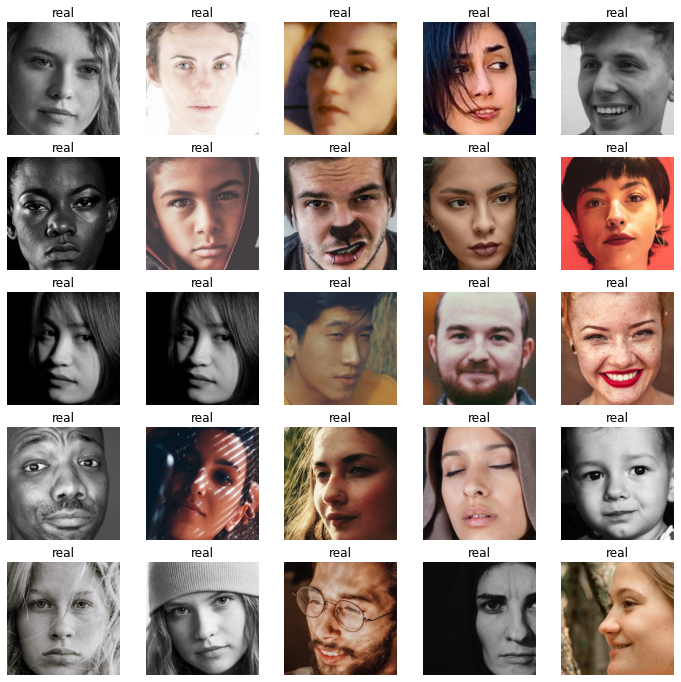

In [9]:
plt.figure(figsize=(12, 12))
for i in range(nrows*ncols):
    ax = plt.subplot(nrows, ncols, i+1)
    plt.title('real')
    plot_image(train_real_dir, train_real_names)

## Fake images

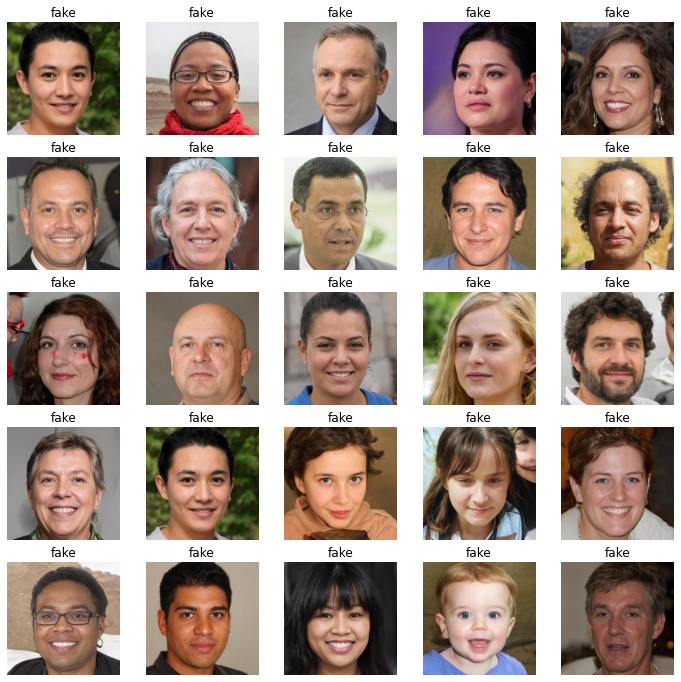

In [10]:
plt.figure(figsize=(12, 12))
for i in range(nrows*ncols):
    ax = plt.subplot(nrows, ncols, i+1)
    plt.title('fake')
    plot_image(train_fake_dir, train_fake_names)

# Building a Model from Scratch

In [20]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [21]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 35, 35, 64)      

In [23]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255,
                                  zoom_range=0.1,
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        './images/', 
        target_size=(300, 300), 
        batch_size=20,
        class_mode='binary')

val_generator = val_datagen.flow_from_directory(
        './val_images/', 
        target_size=(300, 300), 
        batch_size=20,
        class_mode='binary')

Found 1189 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [24]:
history = model.fit(
    train_generator, 
    steps_per_epoch=30,
    epochs=100,
    validation_data=val_generator,
    validation_steps=5
)

Epoch 1/100
30/30 [==============================] - 8s 251ms/step - loss: 0.6904 - accuracy: 0.5167 - val_loss: 0.6856 - val_accuracy: 0.5400
Epoch 2/100
30/30 [==============================] - 8s 263ms/step - loss: 0.6895 - accuracy: 0.5817 - val_loss: 0.6743 - val_accuracy: 0.5800
Epoch 3/100
30/30 [==============================] - 8s 260ms/step - loss: 0.6179 - accuracy: 0.6350 - val_loss: 0.6632 - val_accuracy: 0.5000
Epoch 4/100
30/30 [==============================] - 8s 253ms/step - loss: 0.5811 - accuracy: 0.6808 - val_loss: 0.5248 - val_accuracy: 0.6800
Epoch 5/100
30/30 [==============================] - 7s 249ms/step - loss: 0.5217 - accuracy: 0.7301 - val_loss: 0.4821 - val_accuracy: 0.8000
Epoch 6/100
30/30 [==============================] - 8s 258ms/step - loss: 0.4917 - accuracy: 0.7504 - val_loss: 0.4923 - val_accuracy: 0.8000
Epoch 7/100
30/30 [==============================] - 8s 255ms/step - loss: 0.4403 - accuracy: 0.7878 - val_loss: 0.3658 - val_accuracy: 0.8500

Epoch 58/100
30/30 [==============================] - 8s 259ms/step - loss: 0.0958 - accuracy: 0.9593 - val_loss: 0.0472 - val_accuracy: 0.9800
Epoch 59/100
30/30 [==============================] - 8s 260ms/step - loss: 0.1013 - accuracy: 0.9667 - val_loss: 0.0978 - val_accuracy: 0.9500
Epoch 60/100
30/30 [==============================] - 8s 253ms/step - loss: 0.0707 - accuracy: 0.9745 - val_loss: 0.0914 - val_accuracy: 0.9700
Epoch 61/100
30/30 [==============================] - 8s 256ms/step - loss: 0.0761 - accuracy: 0.9750 - val_loss: 0.0523 - val_accuracy: 0.9900
Epoch 62/100
30/30 [==============================] - 8s 258ms/step - loss: 0.0749 - accuracy: 0.9683 - val_loss: 0.0215 - val_accuracy: 0.9900
Epoch 63/100
30/30 [==============================] - 8s 251ms/step - loss: 0.0420 - accuracy: 0.9864 - val_loss: 0.0481 - val_accuracy: 0.9900
Epoch 64/100
30/30 [==============================] - 8s 255ms/step - loss: 0.0477 - accuracy: 0.9830 - val_loss: 0.0205 - val_accuracy:

<AxesSubplot:>

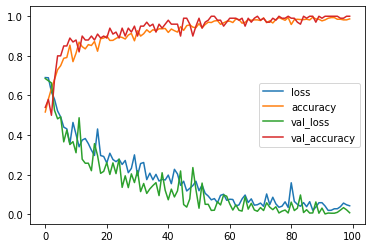

In [25]:
pd.DataFrame(history.history).plot()

In [29]:
model.save("final_model")

INFO:tensorflow:Assets written to: final_model\assets


# Visualizing the model predictions

In [31]:
test_dir = os.path.join('./test/')
test_names = os.listdir(test_dir)

final_model = tf.keras.models.load_model('final_model')

In [32]:
def predict_random_image(folder, names):
    index = random.randint(0, len(names)-1)
    path = folder + names[index]
    img = image.load_img(path, target_size=(300, 300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = final_model.predict(images)
    plt.axis('Off')
    
    if classes[0] >= 0.5:
        prediction = "real"
    else:
        prediction = "fake"
        
    if len(labels[labels['images_id']==names[index][:-4]])>0:
        true_label = labels[labels['images_id']==names[index][:8]]['label'].iloc[0]
        if(true_label== prediction):
            color = 'green'
        else:
            color = 'red'
            
    else:
        #custom image
        color = 'black'
    plt.title(names[index] + " is " + prediction, color=color)
    plt.imshow(img)

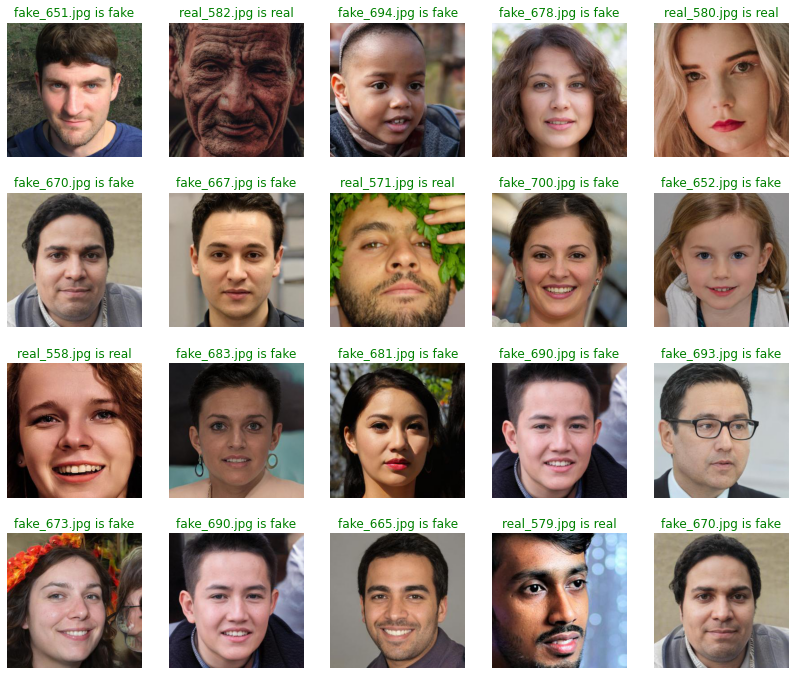

In [33]:
plt.figure(figsize=(14, 12))
for i in range(20):
    ax = plt.subplot(4, 5, i+1)
    predict_random_image(test_dir, test_names)